# Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


# Load Data

In [2]:
data = pd.read_csv('test.csv')
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Describe The Data

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [4]:
for i in list(data.columns):
    print("{} -- {}".format(i, data[i].value_counts().shape[0]))

PassengerId -- 418
Pclass -- 3
Name -- 418
Sex -- 2
Age -- 79
SibSp -- 7
Parch -- 8
Ticket -- 363
Fare -- 169
Cabin -- 76
Embarked -- 3


In [5]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
print(data.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


# Replace the Null Values

In [7]:
mean_value = data['Age'].mean()

data['Cabin'] = data['Cabin'].fillna('Unknown')

# Replace null values with the mean
data['Age'].fillna(mean_value, inplace=True)
data.dropna(subset=['Fare'], inplace=True)

# Alternatively, you can replace NaN values in all string-type columns
string_columns = data.select_dtypes(include='object').columns
data[string_columns] = data[string_columns].fillna('Unknown')



# Drop Unused Columns

In [8]:
# Drop 'PassengerId' and 'Name' columns
columns_to_drop = ['PassengerId', 'Name']
data = data.drop(columns=columns_to_drop, axis=1)



In [9]:
data

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.50000,0,0,330911,7.8292,Unknown,Q
1,3,female,47.00000,1,0,363272,7.0000,Unknown,S
2,2,male,62.00000,0,0,240276,9.6875,Unknown,Q
3,3,male,27.00000,0,0,315154,8.6625,Unknown,S
4,3,female,22.00000,1,1,3101298,12.2875,Unknown,S
...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,A.5. 3236,8.0500,Unknown,S
414,1,female,39.00000,0,0,PC 17758,108.9000,C105,C
415,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S
416,3,male,30.27259,0,0,359309,8.0500,Unknown,S


# Visualize Each Column

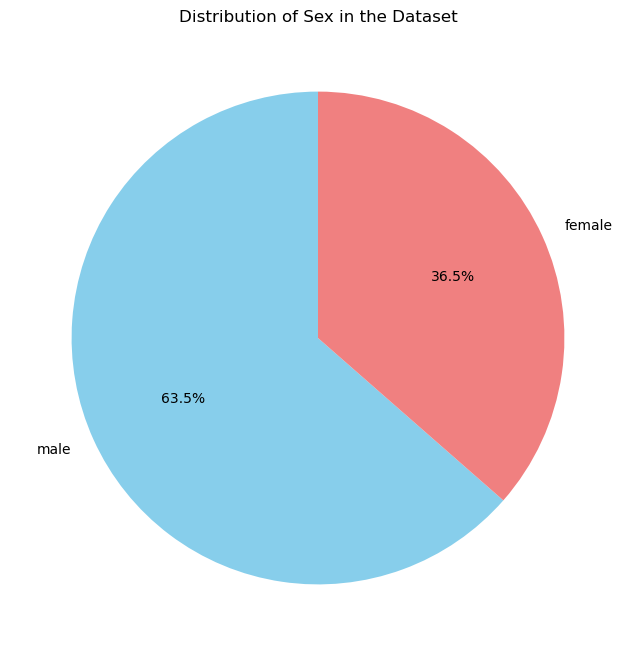

In [10]:
# Count the occurrences of each gender
sex_counts = data['Sex'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Sex in the Dataset')
plt.show()


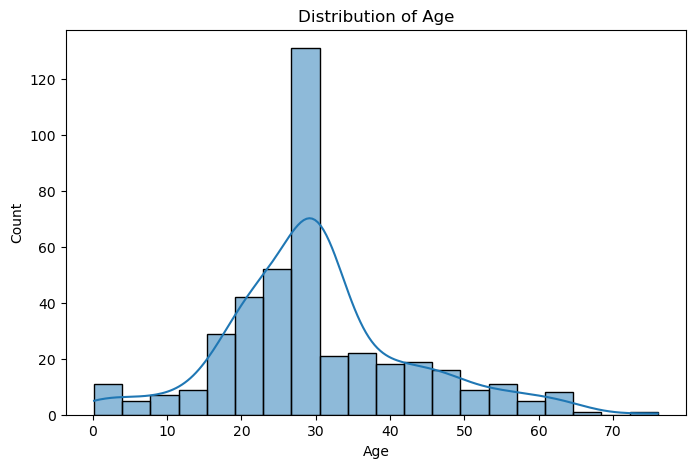

In [11]:
# Visualize 'Age' using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

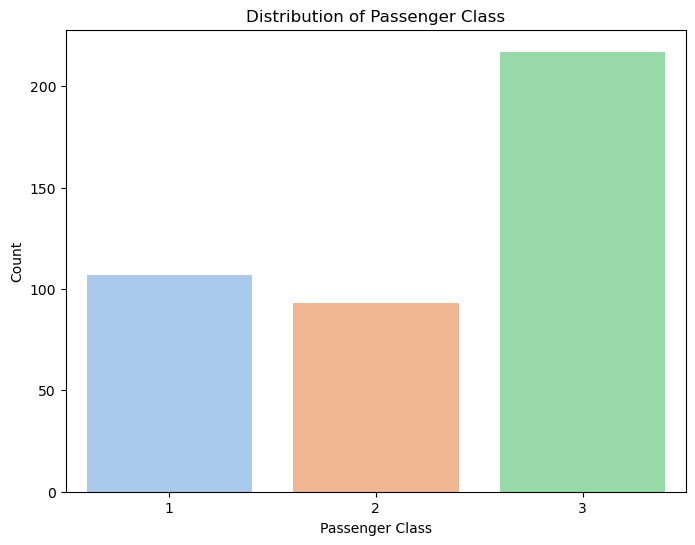

In [12]:
# Visualize the 'Pclass' column using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data, palette='pastel')
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


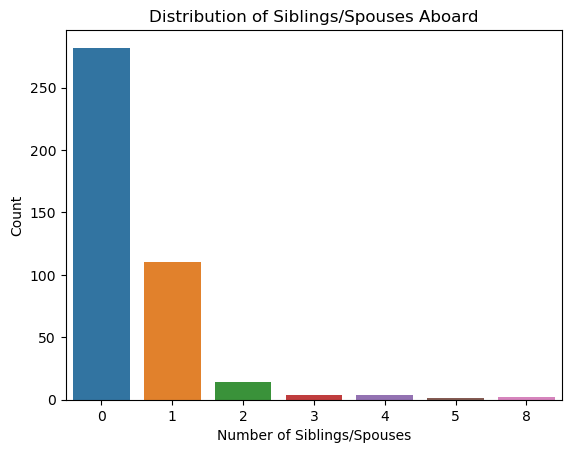

In [13]:
# Visualize the 'SibSp' column
sns.countplot(x='SibSp', data=data)
plt.title('Distribution of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()


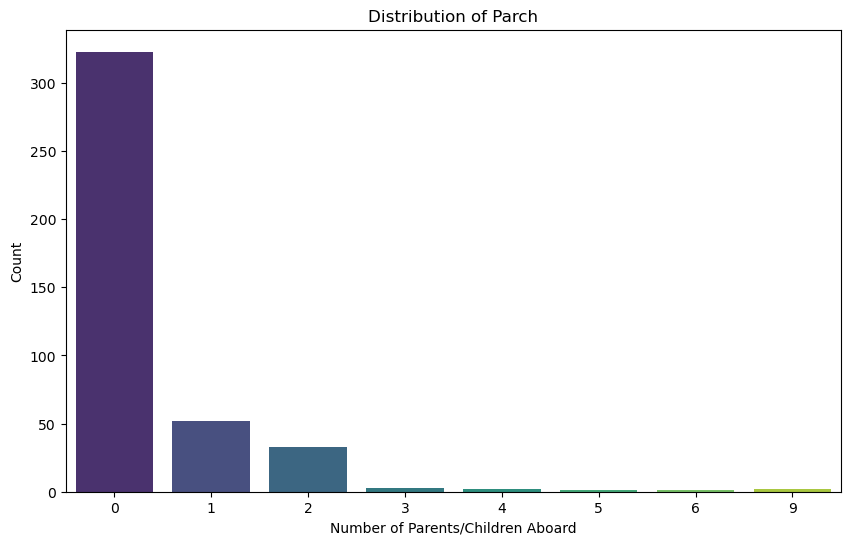

In [14]:
# Visualize the 'Parch' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', data=data, palette='viridis')
plt.title('Distribution of Parch')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()


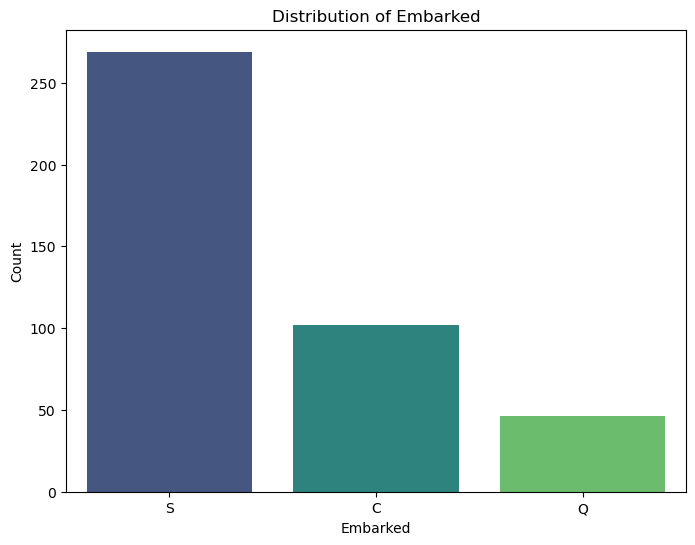

In [15]:
# Count the occurrences of each unique value in 'Embarked'
embarked_counts = data['Embarked'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=embarked_counts.index, y=embarked_counts.values, palette="viridis")
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


# Relation Between Columns 

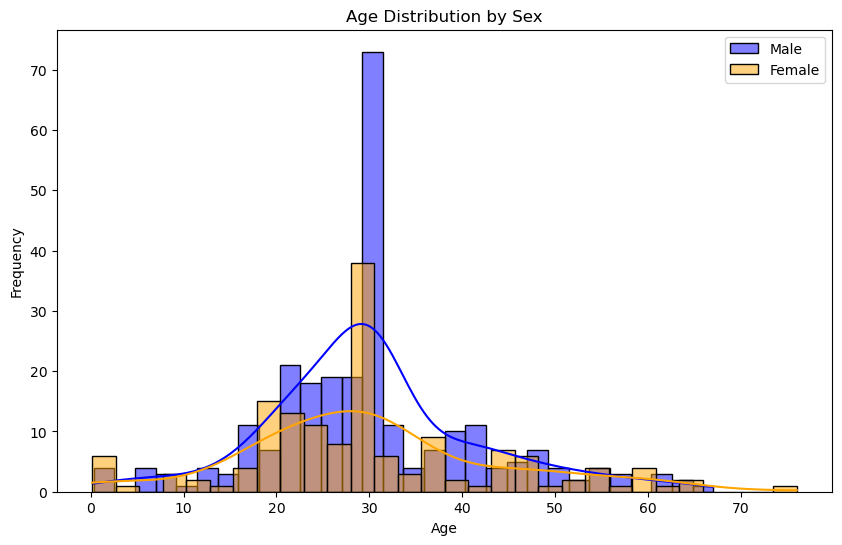

In [16]:
plt.figure(figsize=(10, 6))

# Create separate histograms for each gender
sns.histplot(data[data['Sex'] == 'male']['Age'], label='Male', kde=True, color='blue', bins=30)
sns.histplot(data[data['Sex'] == 'female']['Age'], label='Female', kde=True, color='orange', bins=30)

plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


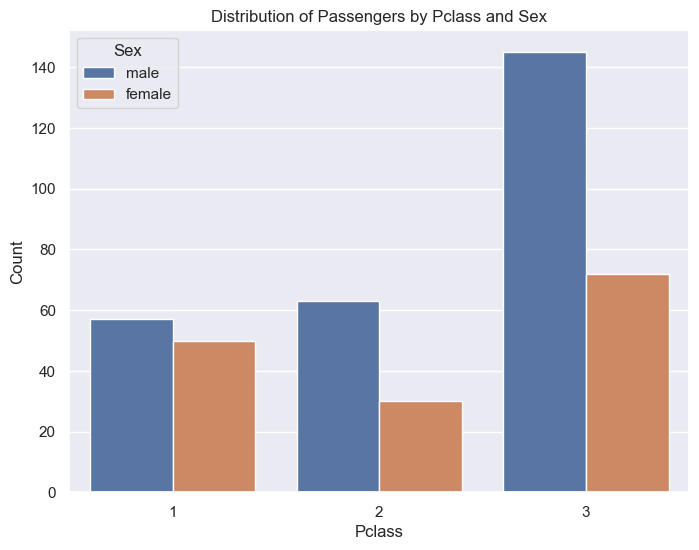

In [17]:
# Visualize the relationship between 'Pclass' and 'Sex'
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

# Create a count plot
sns.countplot(x='Pclass', hue='Sex', data=data)

# Set labels and title
plt.title('Distribution of Passengers by Pclass and Sex')
plt.xlabel('Pclass')
plt.ylabel('Count')

# Show the plot
plt.show()

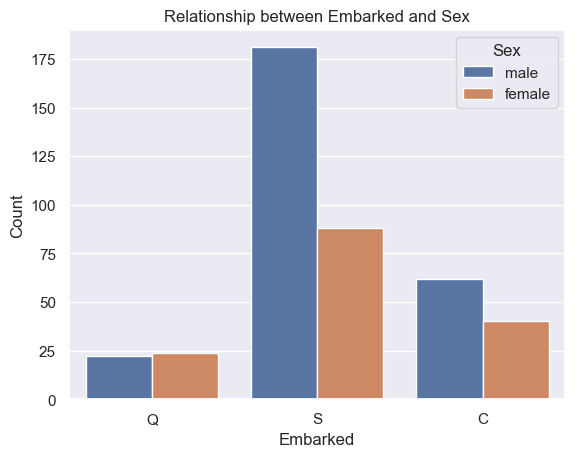

In [18]:
# Create a count plot to visualize the relationship between 'Embarked' and 'Sex'
sns.countplot(x='Embarked', hue='Sex', data=data)

# Add a title and labels
plt.title('Relationship between Embarked and Sex')
plt.xlabel('Embarked')
plt.ylabel('Count')

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

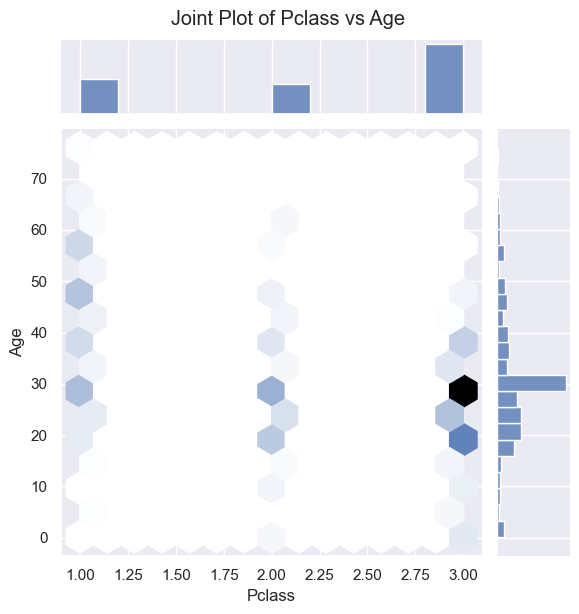

In [19]:
# Joint plot
plt.figure(figsize=(10, 6))
sns.jointplot(x='Pclass', y='Age', data=data, kind='hex')
plt.suptitle('Joint Plot of Pclass vs Age', y=1.02)
plt.show()

C:\Users\abanoup\AppData\Local\Temp\ipykernel_4944\2777979634.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Age', hue='Age Group', data=data, ci=None)


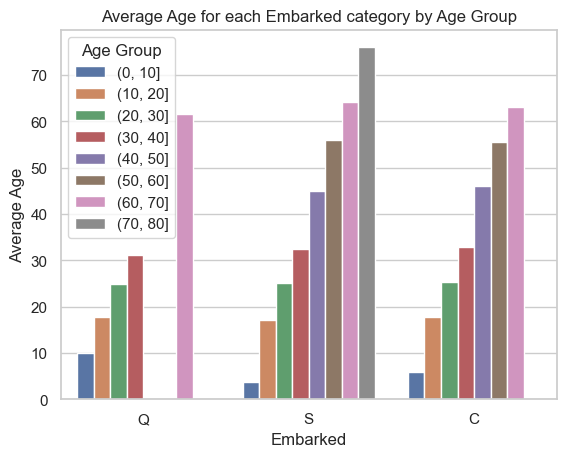

In [20]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Cut the 'Age' column into bins
data['Age Group'] = pd.cut(data['Age'], bins=age_bins)

# Bar chart with 'Embarked' on the x-axis and average 'Age' for each category
sns.barplot(x='Embarked', y='Age', hue='Age Group', data=data, ci=None)

# Set plot labels and title
plt.xlabel('Embarked')
plt.ylabel('Average Age')
plt.title('Average Age for each Embarked category by Age Group')

# Show the plot
plt.show()

C:\Users\abanoup\AppData\Local\Temp\ipykernel_4944\3902652385.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Fare', data=data, ci=None, palette='viridis')


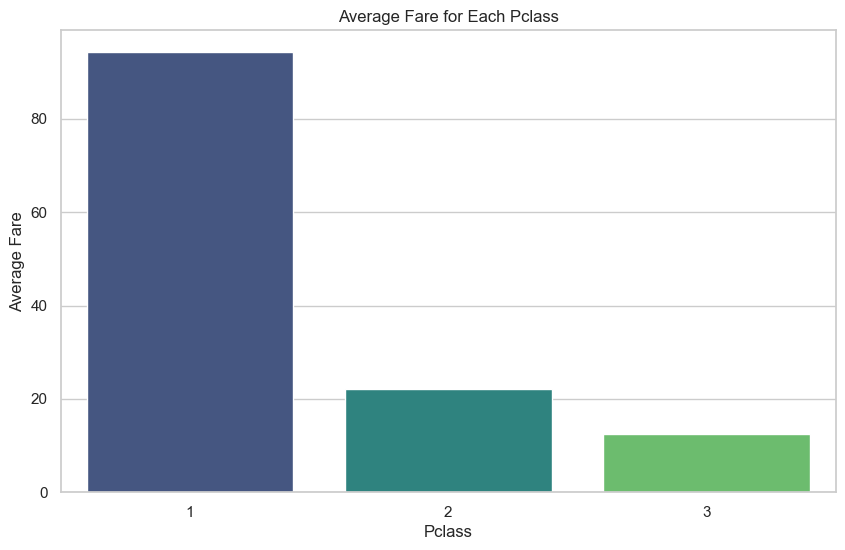

In [21]:
# Grouped bar chart to visualize the average 'Fare' for each 'Pclass'
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Fare', data=data, ci=None, palette='viridis')
plt.title('Average Fare for Each Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.show()


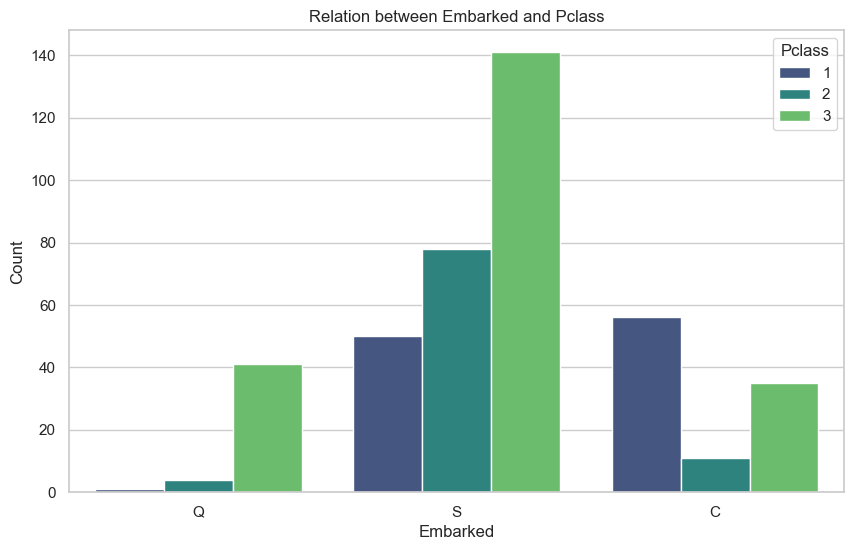

In [22]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the superimposed count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Pclass', data=data, palette='viridis')

# Set the title and labels
plt.title('Relation between Embarked and Pclass')
plt.xlabel('Embarked')
plt.ylabel('Count')

# Show the plot
plt.show()

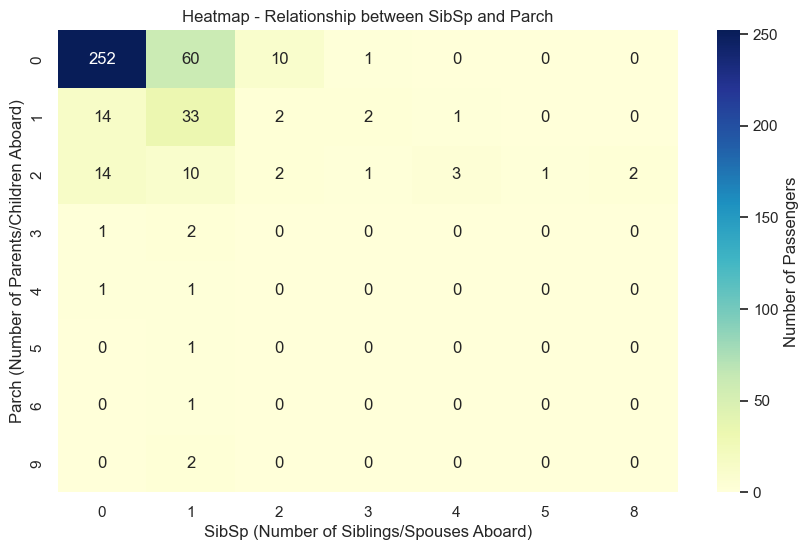

In [23]:
# Create a pivot table to prepare data for the heatmap
heatmap_data = data.pivot_table(index='Parch', columns='SibSp', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Passengers'})
plt.title('Heatmap - Relationship between SibSp and Parch')
plt.xlabel('SibSp (Number of Siblings/Spouses Aboard)')
plt.ylabel('Parch (Number of Parents/Children Aboard)')
plt.show()


# Add New Column (FamileSize)

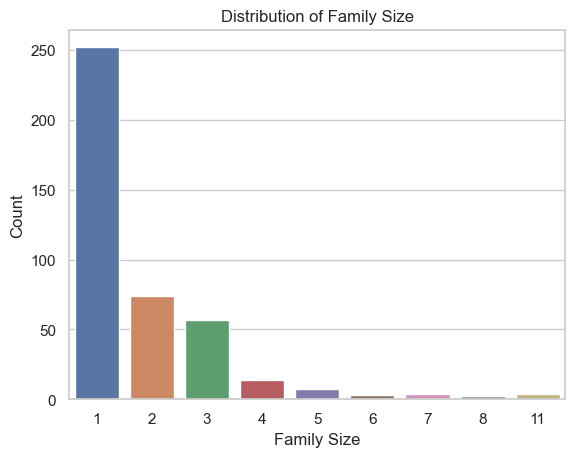

In [24]:
# Create a new column 'FamilySize' by combining 'SibSp' and 'Parch'
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1  # Adding 1 for the passenger themselves

# Visualize the relationship using a countplot
sns.countplot(x='FamilySize', data=data)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()


In [25]:
data

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,FamilySize
0,3,male,34.50000,0,0,330911,7.8292,Unknown,Q,"(30, 40]",1
1,3,female,47.00000,1,0,363272,7.0000,Unknown,S,"(40, 50]",2
2,2,male,62.00000,0,0,240276,9.6875,Unknown,Q,"(60, 70]",1
3,3,male,27.00000,0,0,315154,8.6625,Unknown,S,"(20, 30]",1
4,3,female,22.00000,1,1,3101298,12.2875,Unknown,S,"(20, 30]",3
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,A.5. 3236,8.0500,Unknown,S,"(30, 40]",1
414,1,female,39.00000,0,0,PC 17758,108.9000,C105,C,"(30, 40]",1
415,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S,"(30, 40]",1
416,3,male,30.27259,0,0,359309,8.0500,Unknown,S,"(30, 40]",1


In [26]:
df = pd.read_csv('train.csv')

# Drop 'PassengerId' and 'Name' columns
columns_to_drop = ['PassengerId', 'Name','Ticket','Cabin']
df = df.drop(columns=columns_to_drop, axis=1)

mean_value = df['Age'].mean()

# Replace null values with the mean
df['Age'].fillna(mean_value, inplace=True)
df.dropna(subset=['Fare'], inplace=True)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Impute missing Age values with the median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Impute missing Embarked values with the mode

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Extract features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.8100558659217877
Confusion Matrix:
[[91 14]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [28]:
# Assuming 'test_df' is your test DataFrame with similar structure as the training dataset
test_df = pd.read_csv('test.csv')

# Drop unnecessary columns
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)  # Impute missing Age values with the median
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)  # Impute missing Embarked values with the mode

# Encode categorical variables
le = LabelEncoder()
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])

# Handle missing values in the test dataset (similar to what was done in training)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)  # You may need to impute missing Fare values if any

# Make predictions on the test set
test_predictions = model.predict(test_df)

# Create a new column 'Survived' in the test dataset
test_df['Survived'] = test_predictions

# Map numerical predictions back to 'Yes' or 'No'
test_df['Survived'] = test_df['Survived'].map({1: 'Yes', 0: 'No'})

test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,No
1,1,0,38.0,1,0,71.2833,0,Yes
2,3,0,26.0,0,0,7.9250,2,Yes
3,1,0,35.0,1,0,53.1000,2,Yes
4,3,1,35.0,0,0,8.0500,2,No
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,No
887,1,0,19.0,0,0,30.0000,2,Yes
888,3,0,28.0,1,2,23.4500,2,No
889,1,1,26.0,0,0,30.0000,0,Yes
